In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5,5 
rcParams['figure.figsize'] = 10, 10 
import scipy, scipy.stats
import seaborn as sns
# sns.set(color_codes=True, font_scale=1.2)

%config InlineBackend.figure_format = 'retina'


1000 1000
999


/Users/drazenz/virtualenvs/jupyter/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0
1000 1000
999
0
1000 1000
999
0


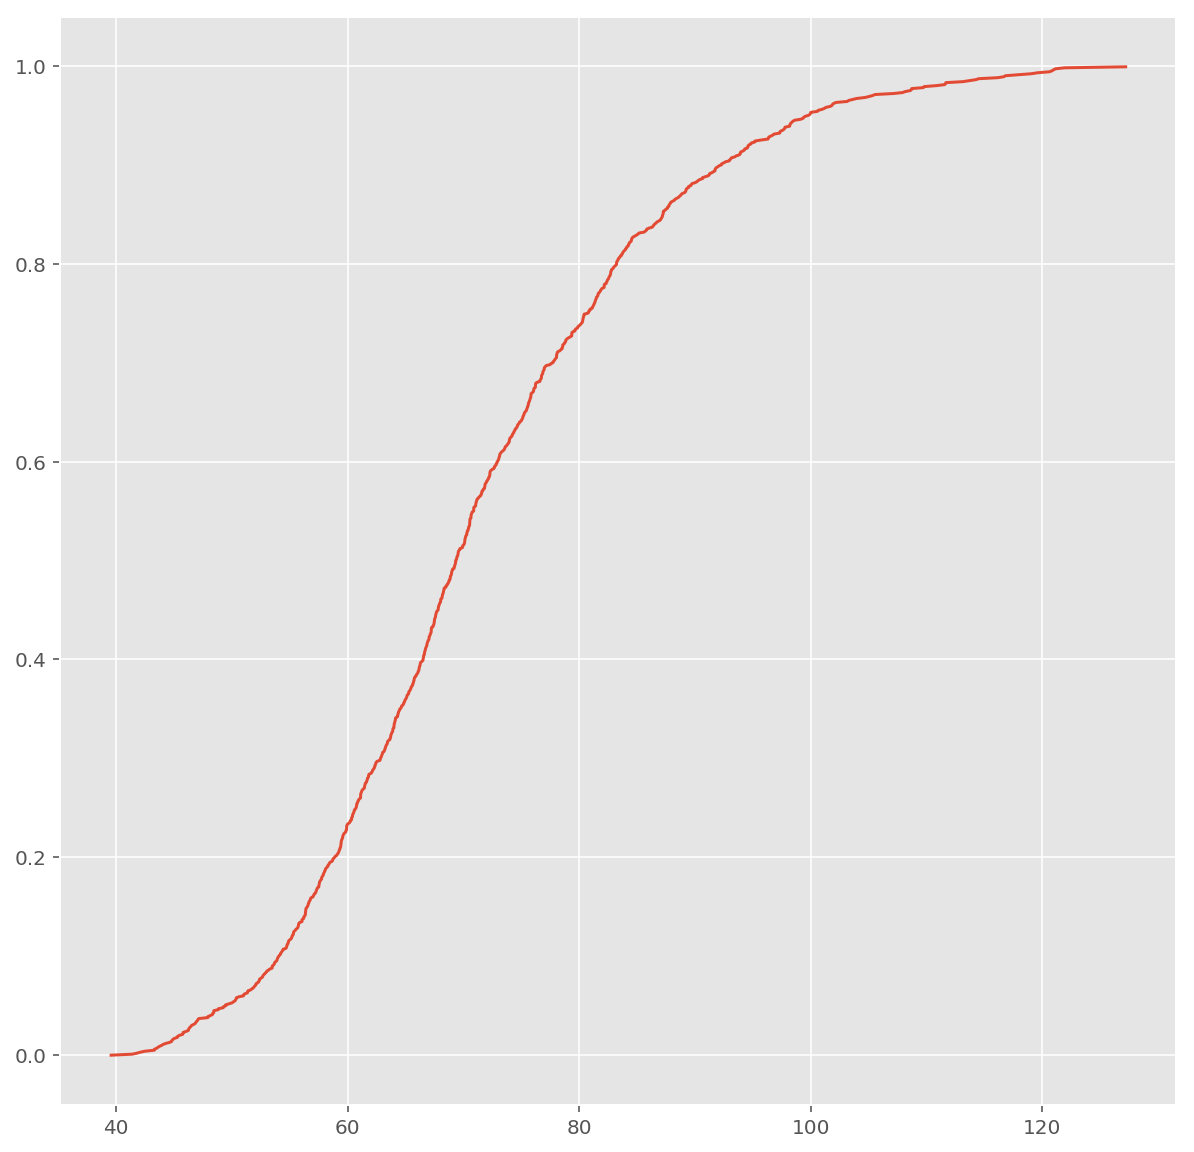

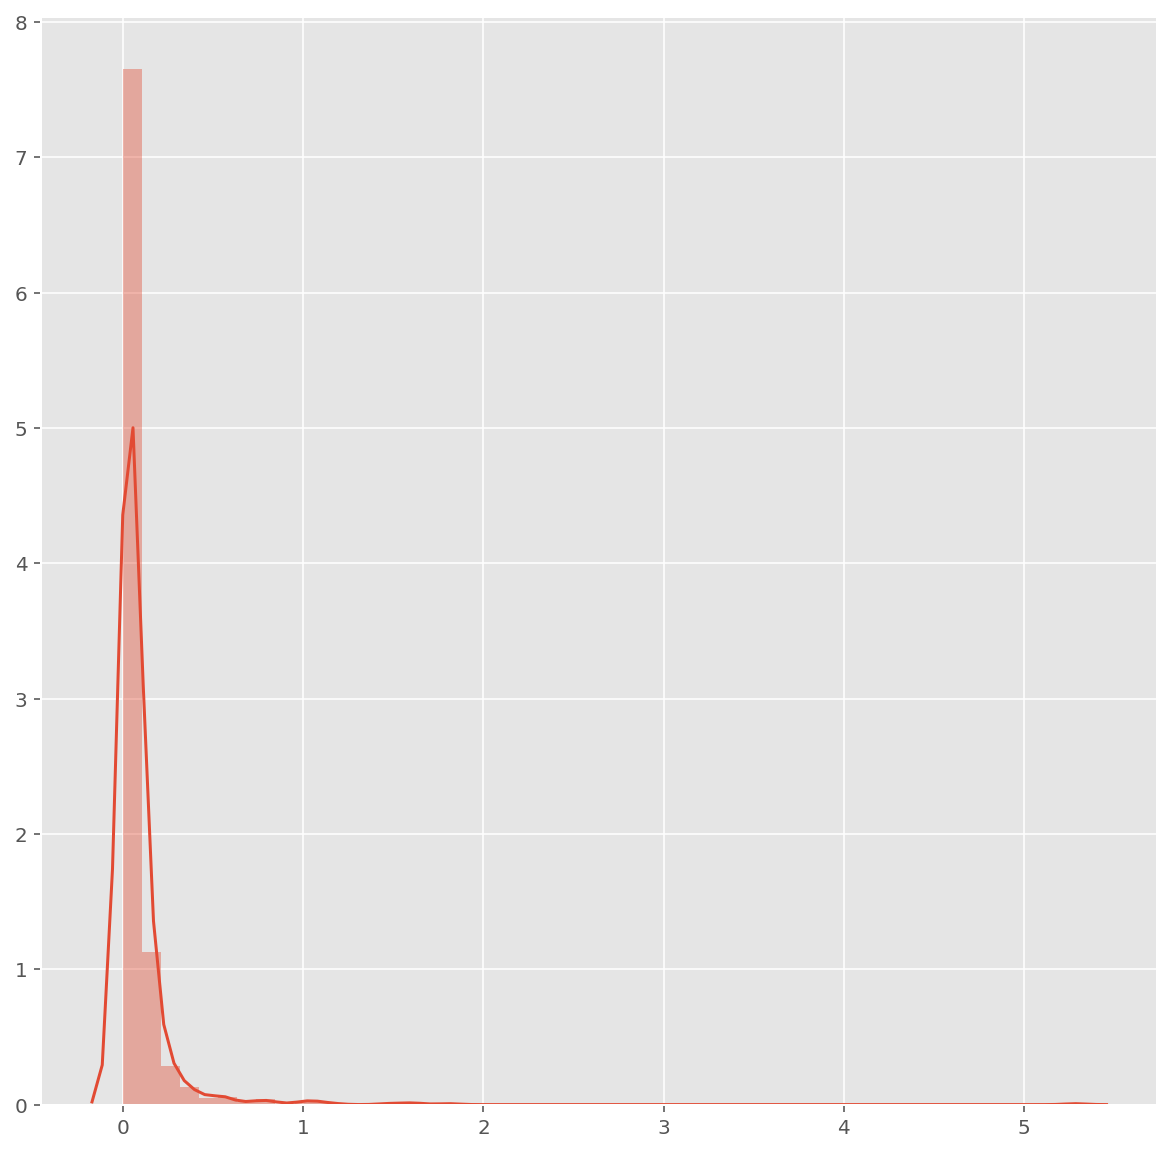

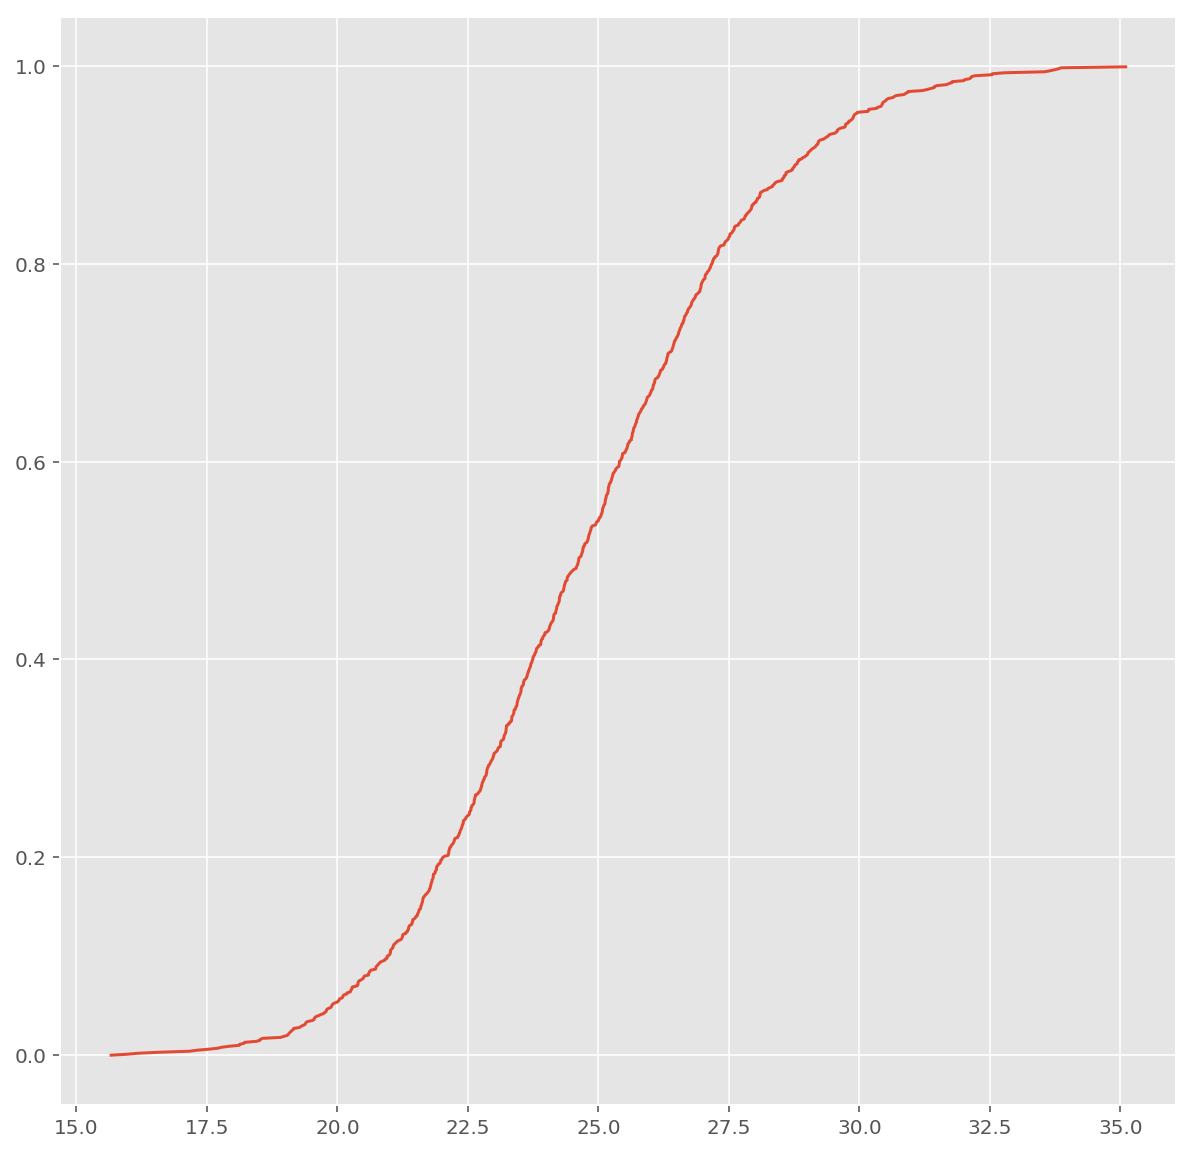

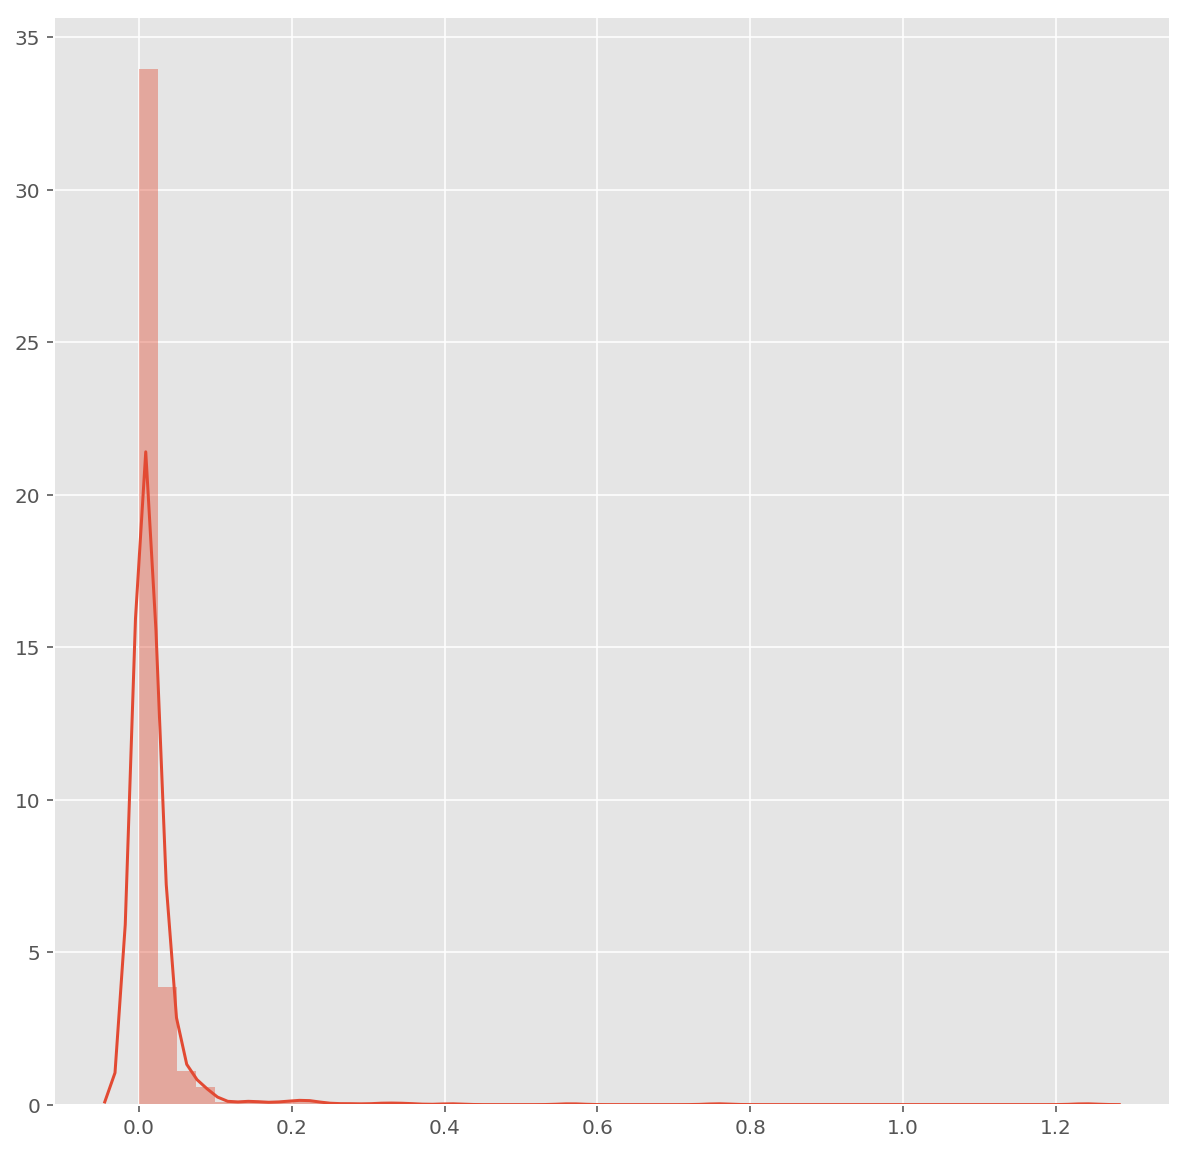

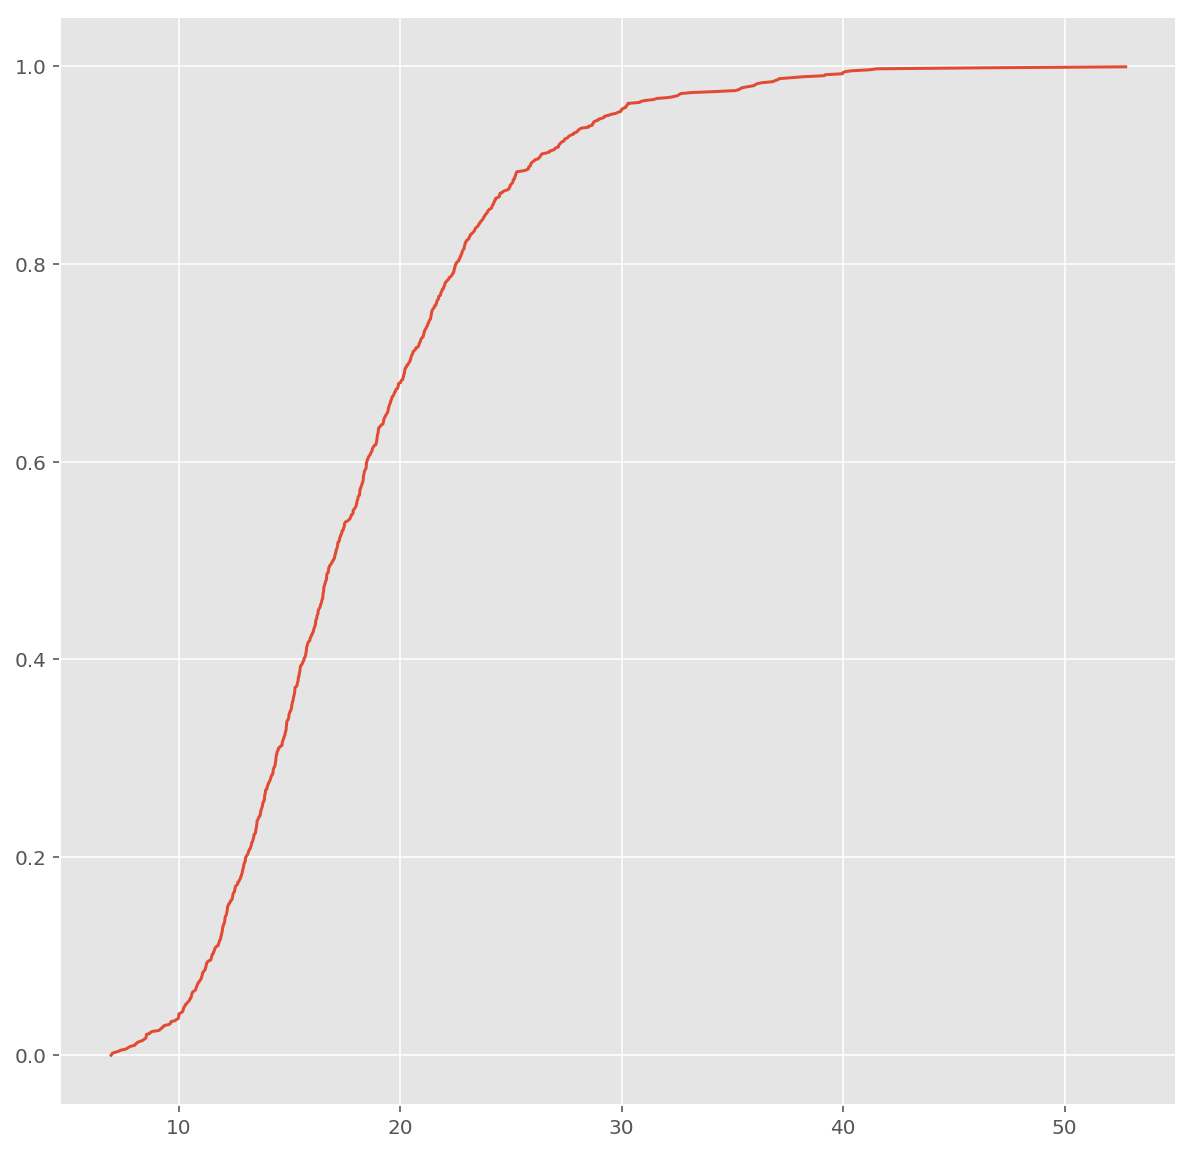

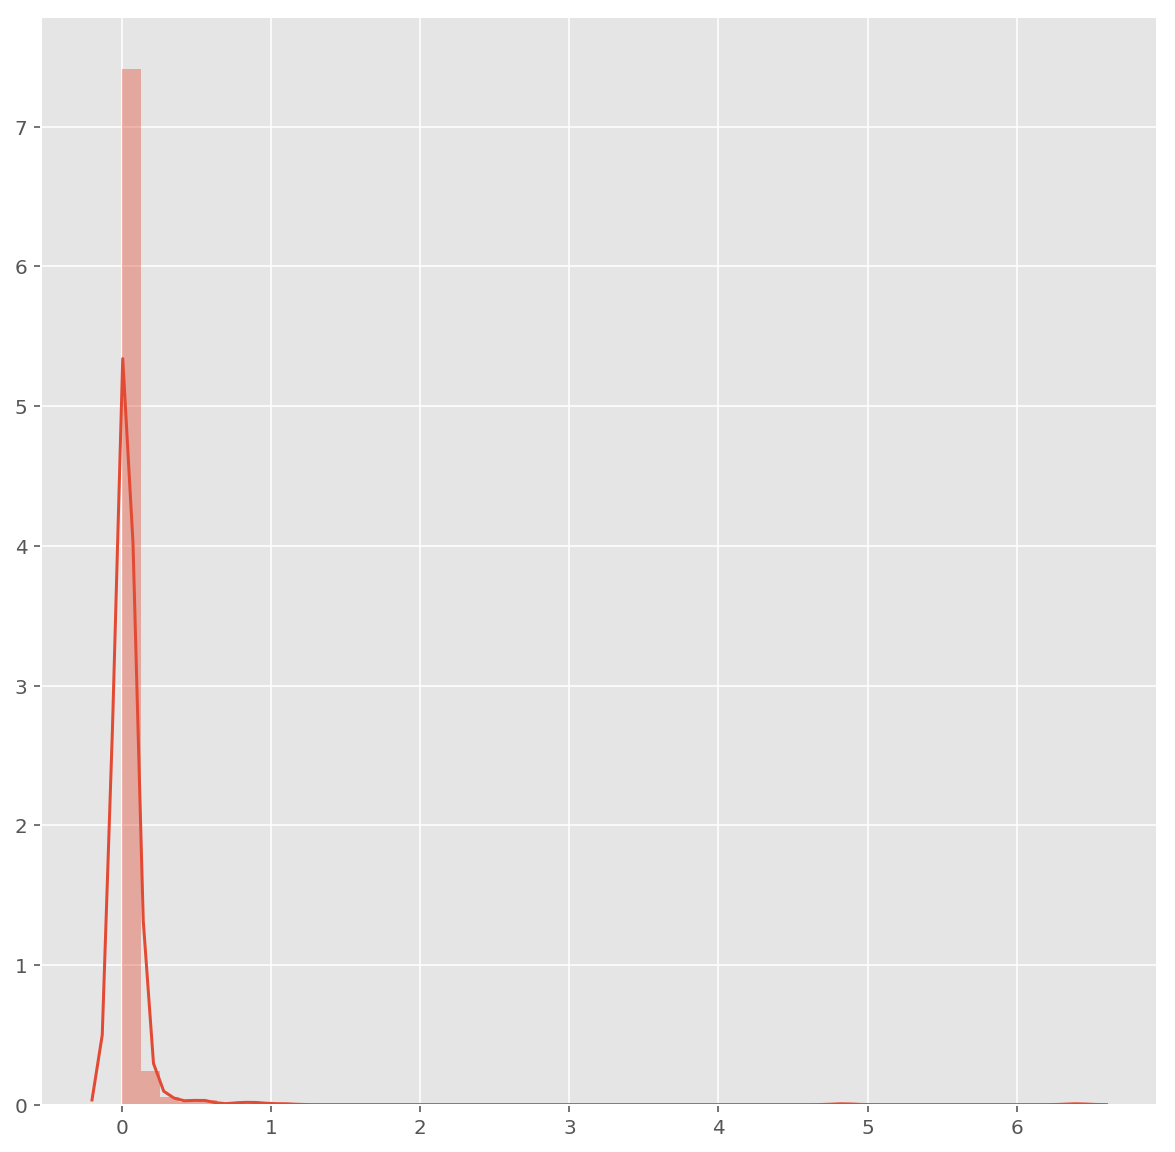

In [2]:
import json

with open('dist.json') as f:
    data = json.load(f)

for dist in data:
    print(len(dist['data']['xs']), len(dist['data']['ys']))
    plt.figure()
    sns.lineplot(dist['data']['xs'], dist['data']['ys'])
#     print(dist['data'].keys())
    xs, ys = dist['data']['xs'], dist['data']['ys']
    diffs = np.array(xs[1:]) - np.array(xs[0:-1])
    print(len(diffs))
    plt.figure()
    sns.distplot(diffs) 
#     print(diffs)
    print(ys[0])
    

In [16]:
for dist in data:
    xs, ys = np.array(dist['data']['xs']), np.array(dist['data']['ys'])
    pdf_x = xs[:-1]
    pdf_y = (ys[1:] - ys[0:-1])
    pdf_dx = xs[1:] - xs[0:-1]
#     plt.figure()
#     plt.scatter(pdf_x, np.ones(len(pdf_x)))
#     plt.bar(pdf_x, height=pdf_y)
#     plt.xlim(65, 70)
#     display(sorted(['{:.03f}'.format(x) for x in pdf_df]))
    

In [17]:
cdfs = []
for dist in data:
    xs, ys = np.array(dist['data']['xs']), np.array(dist['data']['ys'])
    cdfs.append({'x': xs, 'F': ys})

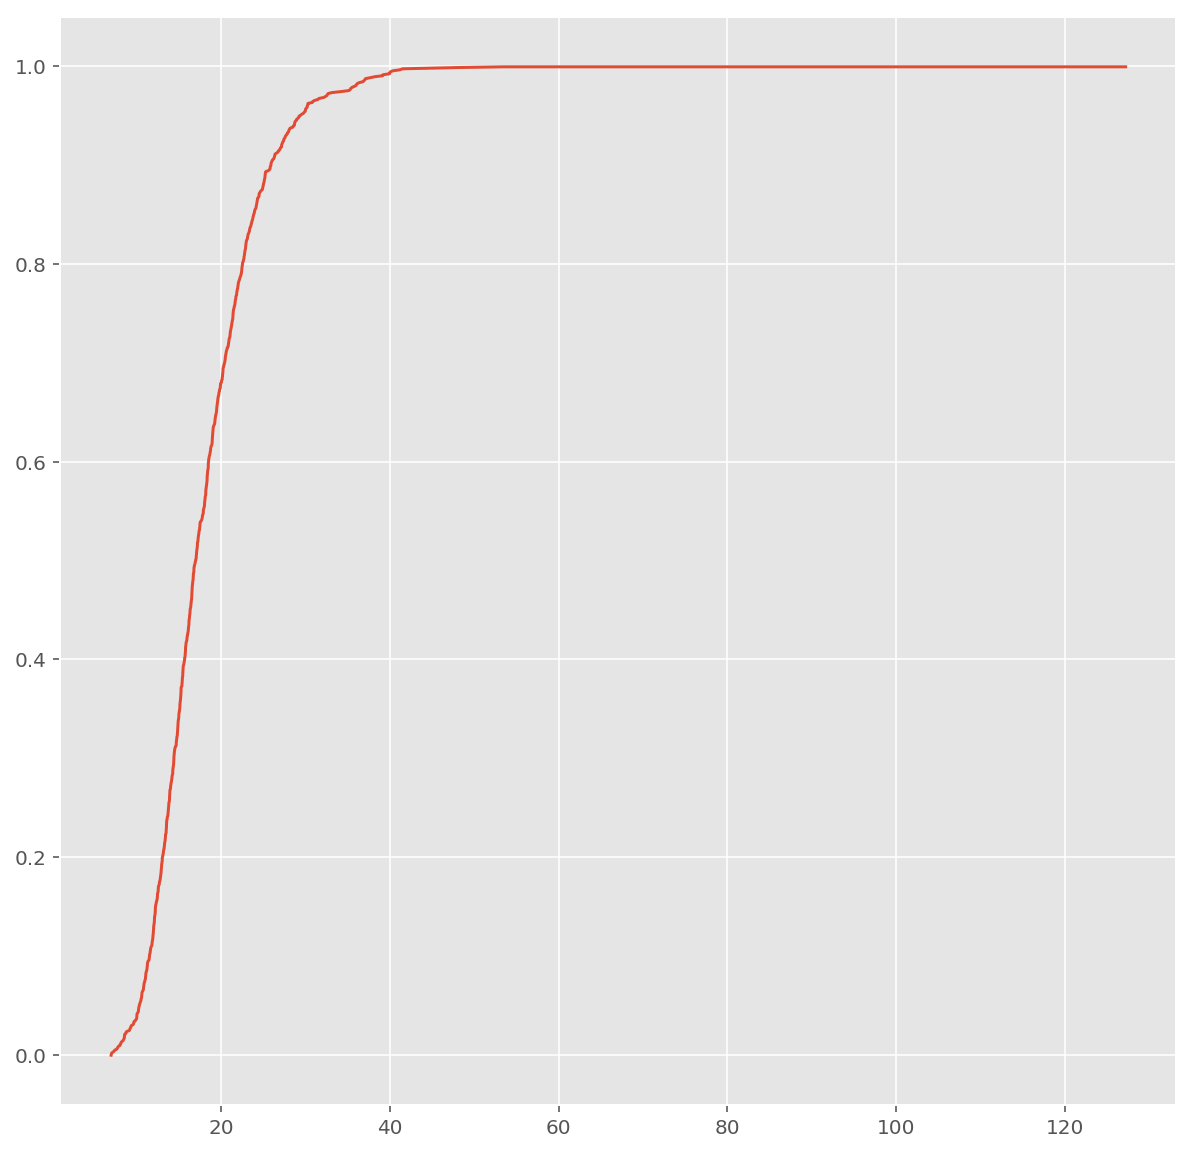

In [29]:
def combine_cdfs(cdfs):
    x_unique = set()
    for cdf in cdfs:
        x_unique.update(cdf['x'])
    
    x_combined = [t for t in sorted(x_unique)]
        
    weights = [1.0 / len(cdfs)] * len(cdfs)
    
    pos = [0] * len(cdfs)
    
    combined_cdf = {'x': [], 'F': []}
    
    for x in x_combined:
        weighted_F = 0
        for j in range(len(cdfs)):
            w = weights[j]
            x_j = cdfs[j]['x']
            F_j = cdfs[j]['F']
            p = pos[j]
            while p + 1 < len(x_j) and x_j[p+1] <= x:
                p += 1
            pos[j] = p
            
            if x < x_j[p]:
                F = 0
            elif p == len(x_j) - 1:
                F = F_j[p]
            else:
                if x == x_j[p]:
                    F = F_j[p]
                else:
                    y1 = F_j[p]
                    y2 = F_j[p + 1]
                    x_units = (x_j[p + 1] - x_j[p]) / (x - x_j[p])
                    y_interp = (y2 - y1) / x_units 
                    F = F_j[p] + y_interp
            
            weighted_F += w * F
        combined_cdf['x'].append(x)
        combined_cdf['F'].append(F)
    return combined_cdf

combined = combine_cdfs(cdfs)
plt.plot(combined['x'], combined['F'])

